Explore Composition of Microbial Community
> By Gati Aher  
> Sept 17, 2021

**Dataset:** FCF Carbon Perturbation (Cellulose-Glucose-Malate)

**Goal:** Exploratory/Composition Analysis

In [115]:
# imports
import skbio
import pandas as pd
import numpy as np
from scipy import stats
import re

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

from sklearn.decomposition import PCA

# Import Processed Data

* Sample metadata
* CLR-Transformed OTU Table

In [116]:
sample_meta = pd.read_csv("../data/processed/sample_metadata.tsv", sep="\t", index_col=0)
sample_meta

,group,series,carbon,transfer,day,replicate,gradient
sampleID,,,,,,,
sC0C,C0C,C0C,C,C0C,C0C,C0C,0
s1C3A,g1C,sC,C,t1,d3,rA,5
s1C3B,g1C,sC,C,t1,d3,rB,5
s1C5A,g1C,sC,C,t1,d5,rA,4
s1C5B,g1C,sC,C,t1,d5,rB,4
...,...,...,...,...,...,...,...
s3G7A,g3G,sG,C,t3,d7,rA,3
s3G7B,g3G,sG,C,t3,d7,rB,3
s3G7C,g3G,sG,C,t3,d7,rC,3


In [117]:
ps_clr = pd.read_csv("../data/processed/OTU_counts_clean_clr.csv", index_col=0)
ps_clr

,sC0C,s1C3A,s1C3B,s1C5A,s1C5B,s1C7A,s1C7B,s1C10A,s1C10B,s1C20B,...,s3G3B,s3G3C,s3G5A,s3G5B,s3G5C,s3G7A,s3G7B,s3G7C,s3G10A,s3G10B
OTU_471,0.475662,0.406338,0.431101,0.293602,-0.048839,-0.141186,-0.833638,-0.096759,0.108872,1.054234,...,-0.669509,-2.435796,-2.912067,-0.887311,-1.576586,-1.212553,-1.349052,-1.455445,-1.551727,-1.153997
OTU_620,2.482110,2.505287,2.162710,2.113365,2.332989,1.837049,1.644536,1.628516,1.868040,2.353117,...,0.583278,-0.234066,-0.188561,0.150491,0.139638,0.066557,-0.365414,-0.204649,0.449753,0.224383
OTU_640,6.726834,6.860219,6.646034,6.307509,6.351550,6.063484,5.920920,6.145329,5.986482,6.952428,...,4.891846,4.469997,4.761286,4.204227,3.755028,4.170549,4.189139,4.067264,4.806115,4.516620
OTU_403,0.022555,0.133760,-0.720231,-1.158767,-1.756569,-3.022435,-0.471234,-0.956570,-0.104698,0.056650,...,-2.461435,-2.435796,-2.912067,-1.822961,-3.346914,-3.211193,-3.163568,-1.107947,-3.161165,-1.705760
OTU_24,1.929417,2.073017,1.853102,1.647488,1.816504,1.635199,1.442149,1.039400,1.113444,2.014789,...,0.311341,-0.822302,-0.188561,-0.239421,-1.229554,0.066557,-1.349052,0.184562,-0.025671,-0.016057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTU_236,-0.458920,-2.680306,-2.722418,-2.864199,-3.153870,-3.022435,-0.833638,-0.310264,-0.376625,-0.422004,...,-2.461435,-0.822302,-0.818129,-3.312103,-0.453506,-0.208632,-1.349052,-1.455445,-0.596216,-1.705760
OTU_82,-3.085708,-2.680306,-1.286710,-2.864199,-1.756569,-3.022435,-2.901607,-1.562142,-3.148791,-1.373665,...,-2.461435,-0.822302,-0.818129,0.036619,-0.113587,0.143695,-0.365414,-0.204649,0.809127,0.224383
OTU_300,-3.085708,-2.680306,-1.286710,-2.864199,-1.756569,-0.615317,0.176914,-1.562142,-1.357408,0.622399,...,-0.669509,-2.435796,0.194779,0.150491,0.211557,0.740668,0.635821,0.184562,0.449753,0.502452
OTU_49,-0.458920,-0.851594,-0.360823,-0.189272,-0.575390,0.779214,0.761906,1.398513,1.687043,1.987582,...,-2.461435,0.133832,2.053127,2.202120,2.383138,1.798400,2.062027,2.148278,2.142140,2.269767


# Set Up Consistent Styling

*Key:*
- Shape indicates current carbon
- Fill Color indicates day
- Stroke Color indicates series
- Stroke Width indicates transfer

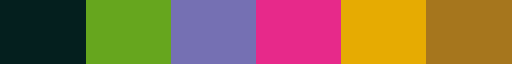

In [118]:
# defaults
def_marker_size = 10
def_color = "#041F1E"
def_line_color = "#707070"

#################
# carbon: shape #
#################

map_carbon_shapes = {
    "C0C": "o",
    "C": "o",
    "G": "s",
    "M": "^",
}

###################
# day: fill color #
###################

colors_days = [
    "#041F1E", # C0C
    "#66A61E", # d3
    "#7570B3", # d5
    "#E7298A", # d7
    "#E6AB02", # d10
    "#A6761D", # d20
]

map_days_colors = {
    "C0C": colors_days[0], 
    "d3": colors_days[1],
    "d5": colors_days[2],
    "d7": colors_days[3],
    "d10": colors_days[4],
    "d20": colors_days[5],
}

cmap_days = ListedColormap(colors_days, name="days")
cmap_days

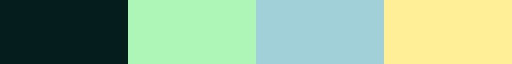

In [119]:
##########################
# transfer: stroke width #
##########################

widths_transfers = [
    1, # C0
    5, # t1
    3, # t2
    2, # t3
]

map_transfers_widths = {
    "C0C": widths_transfers[0],
    "t1": widths_transfers[1],
    "t2": widths_transfers[2],
    "t3": widths_transfers[3],
}

########################
# series: stroke color #
########################

# series
colors = [
    "#041F1E", # original community 
    "#ADF7B6", # cellulose
    "#A0CED9", # glucose
    "#FFEE93", # malate
]

map_carbon_colors = {
    "C0C": colors[0],
    "sC": colors[1],
    "sG": colors[2],
    "sM": colors[3],
}

cmap = ListedColormap(colors, name="carbon")
cmap

# PCA

Apply PCA to OTU Table

In [120]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ps_clr.T)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'], index=list(ps_clr.columns))
principalDf

,PC1,PC2
sC0C,-2.903472,8.896864
s1C3A,-9.077279,3.668881
s1C3B,-6.914718,4.539015
s1C5A,-6.574544,-12.225996
s1C5B,-1.348552,-4.400836
...,...,...
s3G7A,13.907917,4.291797
s3G7B,12.696064,3.938947
s3G7C,12.676373,0.526570
s3G10A,7.451679,12.309954


# Visualize PCA

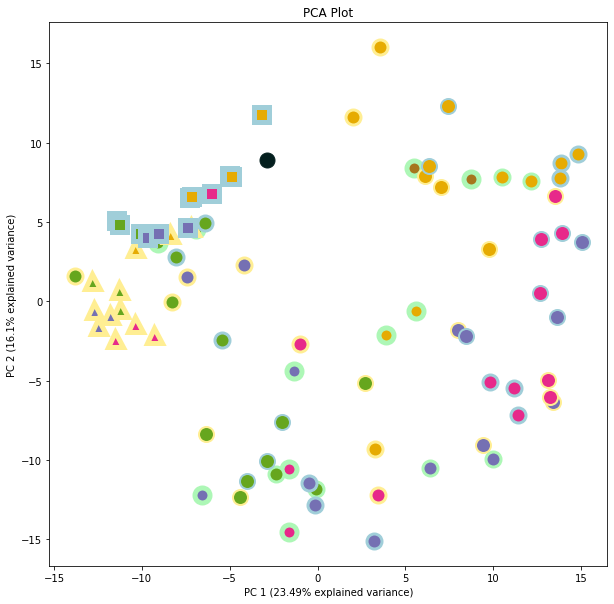

In [136]:
def plot_styled_pcoa(pc, eigs, df_annotations, title="PCoA", day_mode=False):
    f, ax = plt.subplots(figsize=(10, 10))
    for sample_label in pc.index:
        data = pc.loc[sample_label]
        if (df_annotations.loc[sample_label, "carbon"] == "C" or True):
            # set plot variables
            carbon_style = map_carbon_shapes[df_annotations.loc[sample_label, "carbon"]]
            day_style = map_days_colors[df_annotations.loc[sample_label, "day"]]
            series_style = map_carbon_colors[df_annotations.loc[sample_label, "series"]]
            transfer_style = map_transfers_widths[df_annotations.loc[sample_label, "transfer"]]    
            # set plot styling
            plotline = ax.plot(data["PC1"], data["PC2"])
            plt.setp(plotline, markersize=15, marker=carbon_style, color=day_style, markeredgecolor=series_style, markeredgewidth=transfer_style)
#             plt.setp(plotline, markersize=10, marker = carbon_style, color=day_style)
    ax.set_title(title)
    ax.set_xlabel(f"PC 1 ({round(100 * eigs[0], 2)}% explained variance)")
    ax.set_ylabel(f"PC 2 ({round(100 * eigs[1], 2)}% explained variance)")
    
plot_styled_pcoa(principalDf, pca.explained_variance_ratio_, sample_meta, title="PCA Plot")